#Problem Statement

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.



Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.


##Data Dictionary

Booking_ID: the unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel

type_of_meal_plan: Type of meal plan booked by the customer:
Not Selected – No meal plan selected
Meal Plan 1 – Breakfast
Meal Plan 2 – Half board (breakfast and one other meal)
Meal Plan 3 – Full board (breakfast, lunch, and dinner)

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group

lead_time: Number of days between the date of booking and the arrival date

arrival_year: Year of arrival date

arrival_month: Month of arrival date

arrival_date: Date of the month

market_segment_type: Market segment designation.

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer before the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer before the current booking

avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Flag indicating if the booking was canceled or not.




In [2]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline
import seaborn as sns
# Library to split data
from sklearn.model_selection import train_test_split
# To build model for prediction
from sklearn.svm import SVC

#Preprocessing
from sklearn.preprocessing import MinMaxScaler

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
  )

In [3]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Loading the dataset

In [5]:
#Reading the provided dataset
data=pd.read_csv('/content/INNHotelsGroup.csv')

In [ ]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
# copying data to another variable to avoid any changes to original data
df1 = data.copy()

#Data Overview

##Displaying the first few rows of the dataset

In [7]:
df1.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


#Checking the shape of the dataset

In [8]:
df1.shape

(36275, 19)

There are 36275 rows and 10 columns in the given dataset.

#Checking the data types of the columns for the dataset

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**Observations**

5 columns are of the object type columns and 15 columns are of numerical type columns

In [10]:
# finding the number of missing values
df1.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


There are no missing values in the given dataset
#checking for the duplicates



In [11]:
df1.duplicated().sum()

0

In [12]:
df1.isna().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


#Statistical summary of the dataset

In [13]:
df1.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


#Univariate Analysis


In [14]:
# Summarize categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Value counts for {col}:\n")
    print(data[col].value_counts())

Value counts for Booking_ID:

Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64
Value counts for type_of_meal_plan:

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64
Value counts for room_type_reserved:

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64
Value counts for market_segment_type:

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64
Value counts for booking_status:

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64


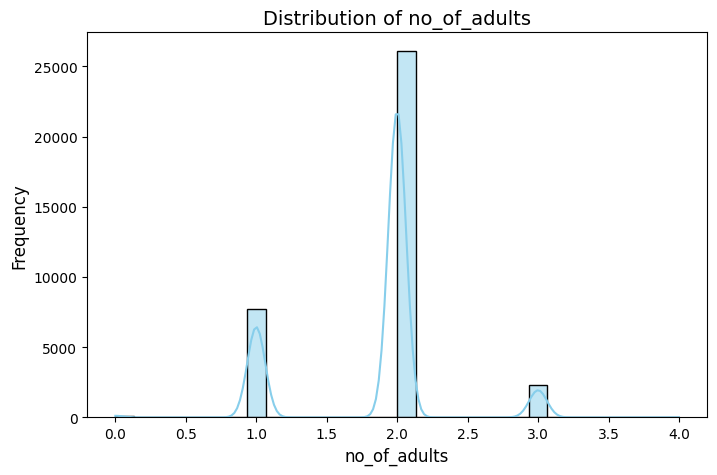

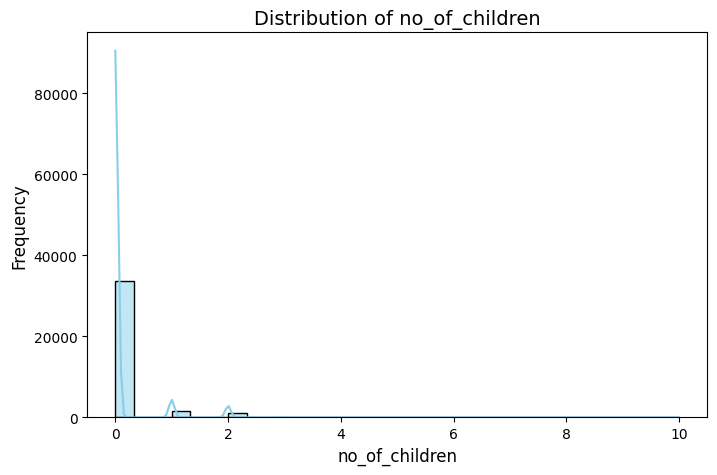

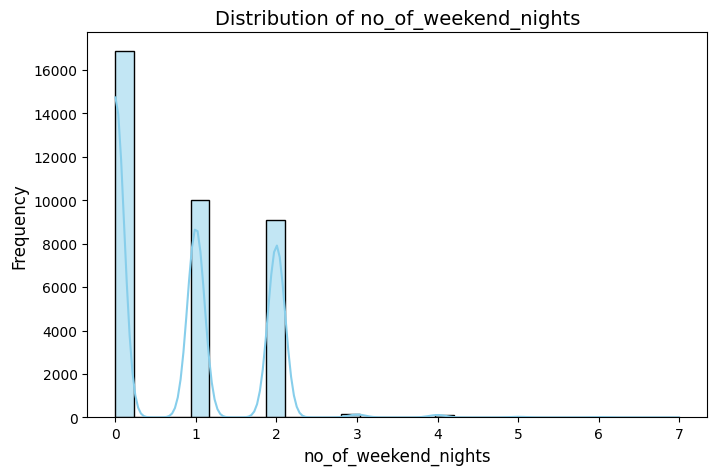

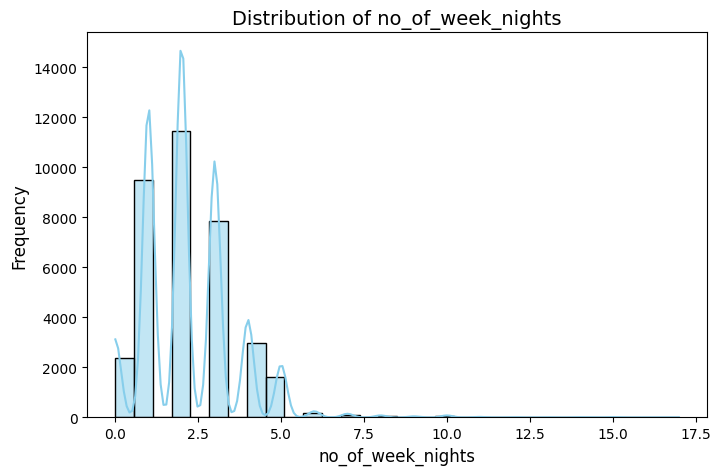

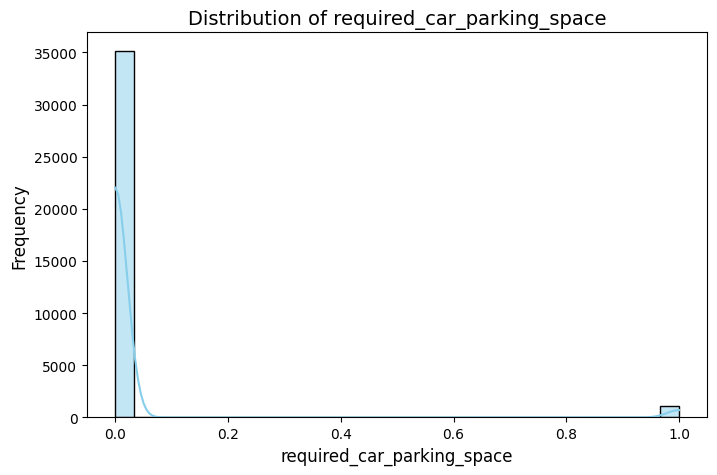

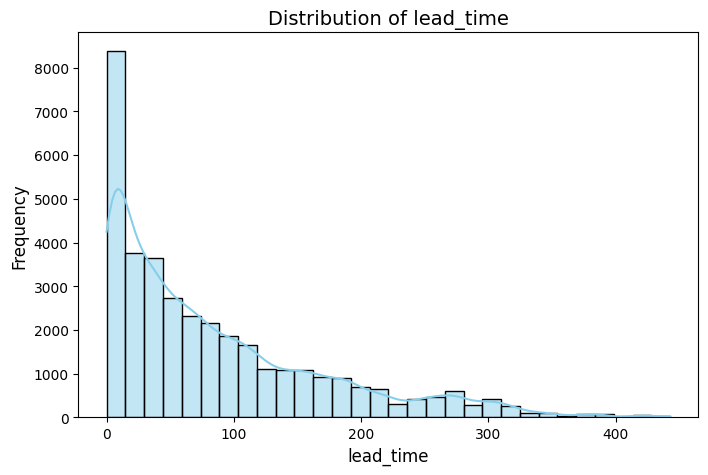

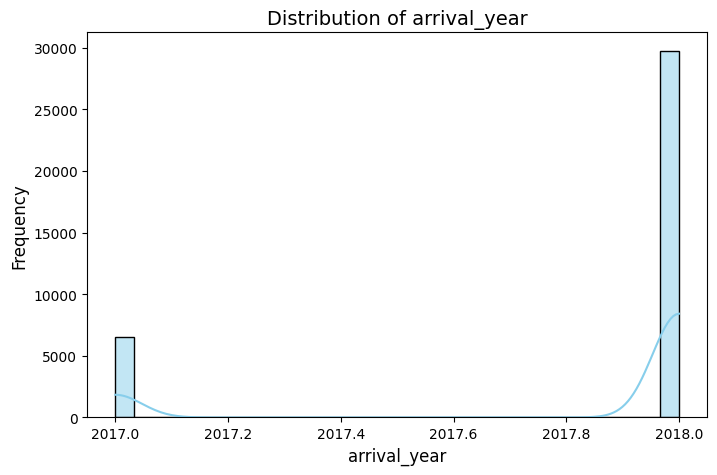

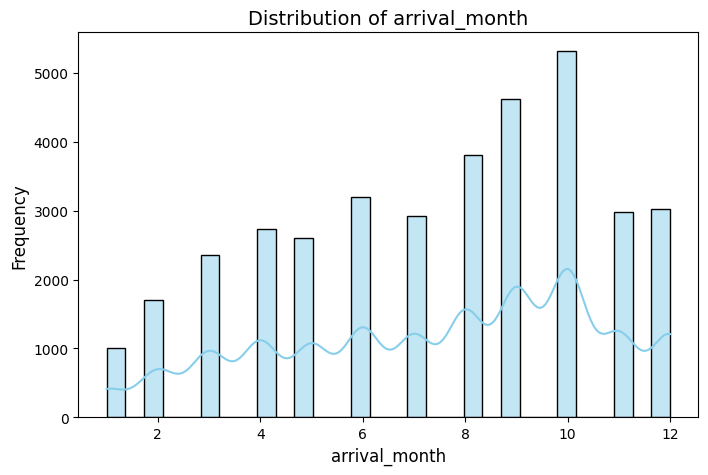

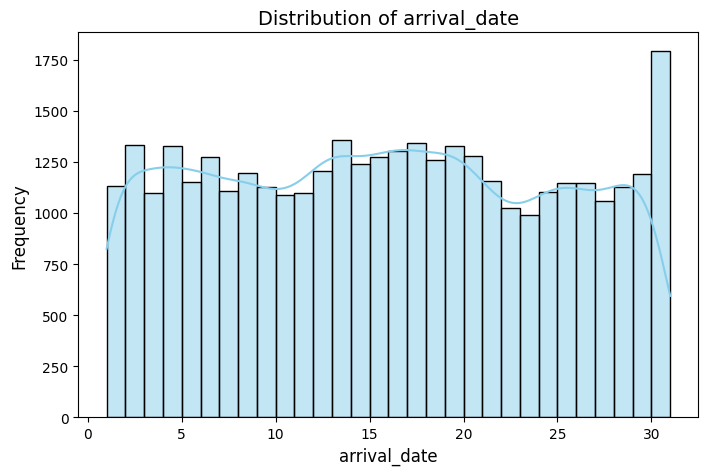

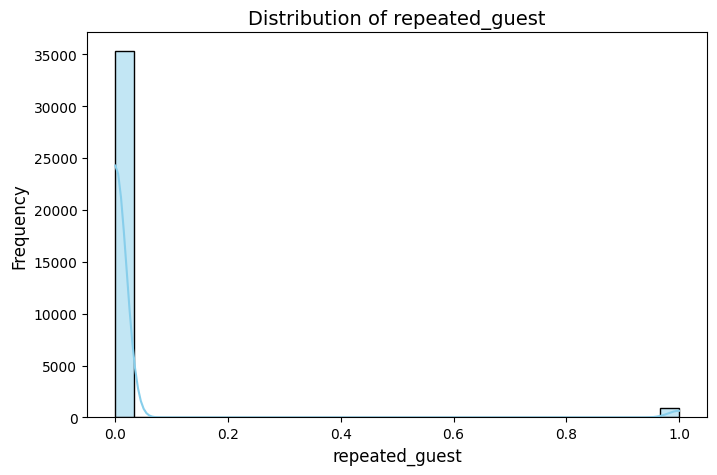

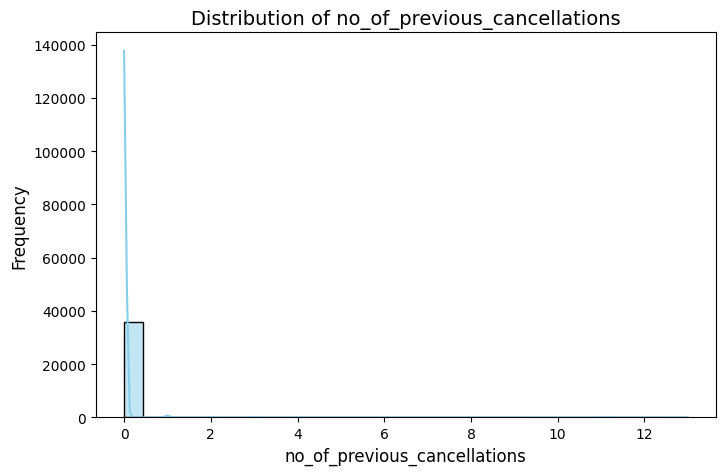

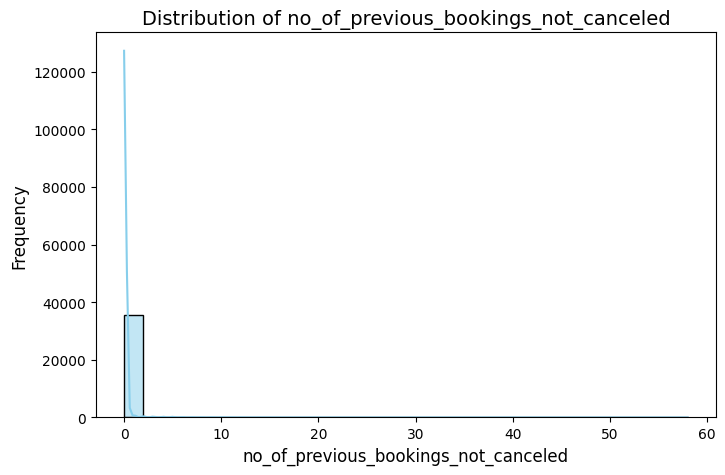

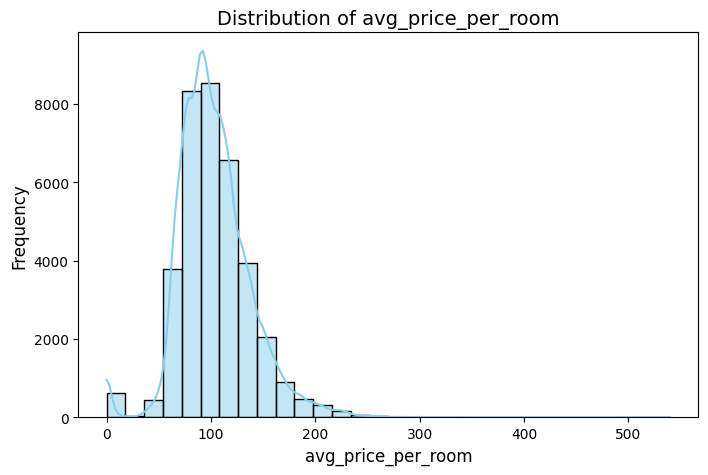

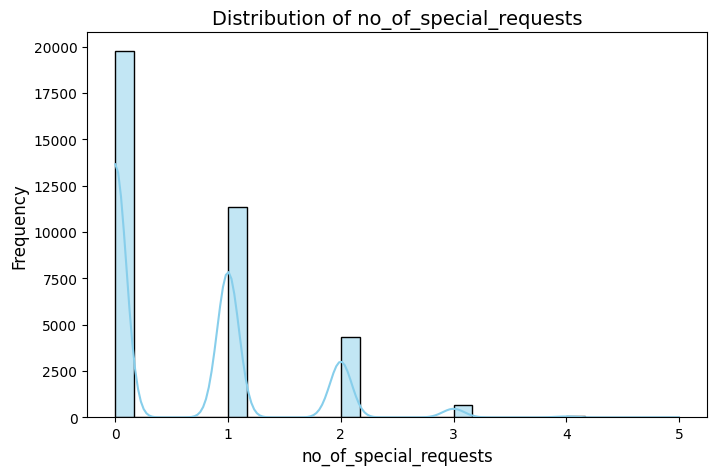

In [15]:
# Univariate Analysis for Numerical Columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

* Most bookings are made for 2 adults.
* Majority of bookings are for families with no children.
* The number of weekend nights booked is skewed towards fewer nights, typically 1 or 2 nights.
* The distribution peaks at 1-3 nights, with longer weekday stays being less common.
* The lead time distribution is highly right-skewed. A significant number of bookings are made with a lead time of less than 50 days.
* The average room price varies widely, with a concentration around lower prices
* Majority of customers make no special requests.




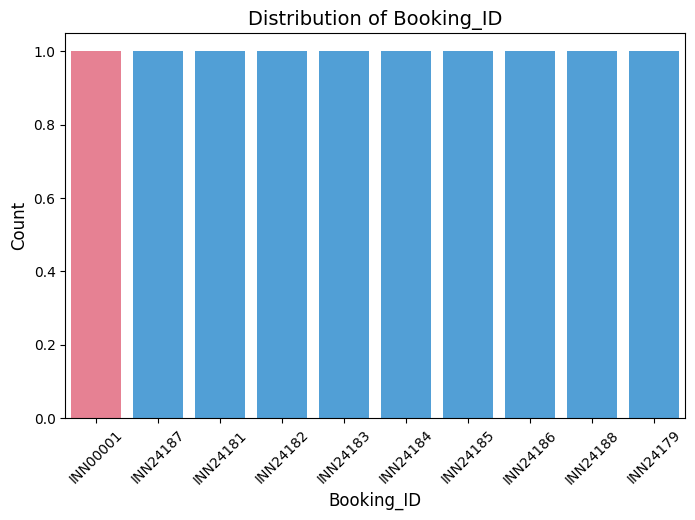

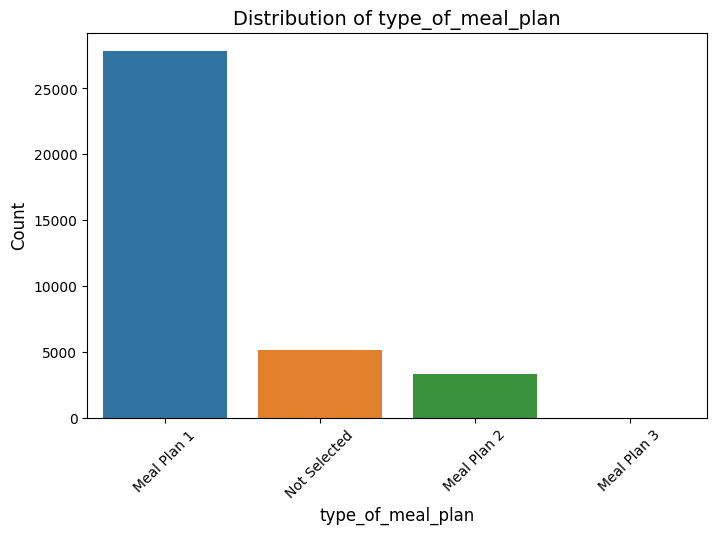

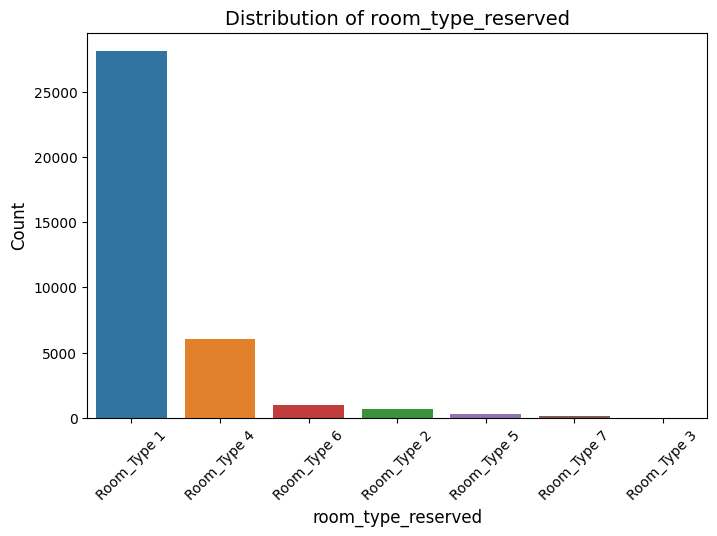

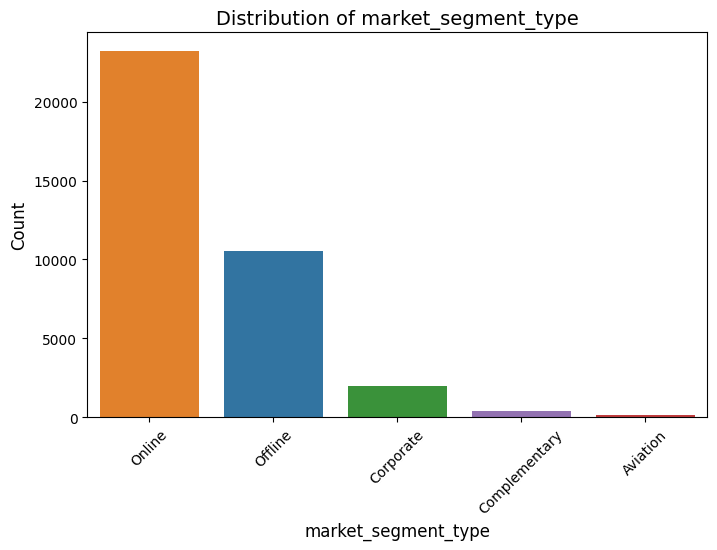

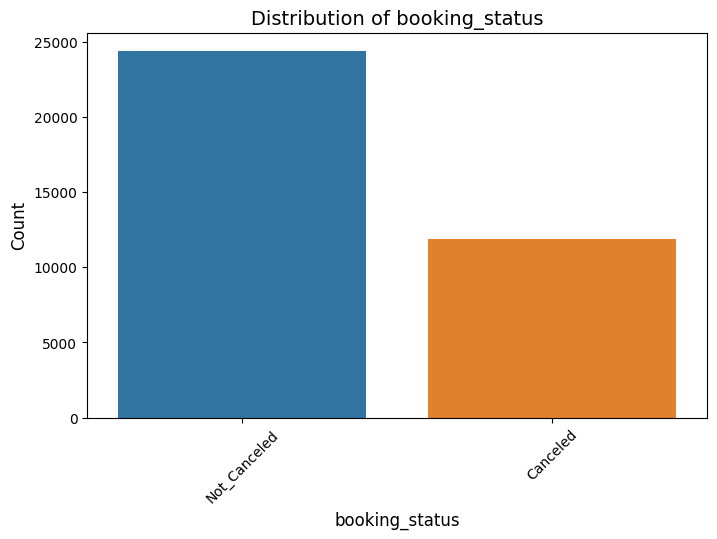

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    # Limit the number of categories to avoid overloading
    top_n_categories = data[col].value_counts().nlargest(10).index  # Adjust 10 to the desired number of categories
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df1, x=col, order=top_n_categories, hue=col, legend=False)
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

* Most guests prefer "Meal Plan 1" (Breakfast).
* Room_Type 1 is the most frequently reserved.
* "Online" bookings dominate the dataset.
* Most bookings are from first-time guests.
* A significant portion of bookings are marked as "Canceled", indicating the need for predictive modeling.

#Key Observations:
* The distribution of numerical features like lead time, number of nights, and price suggests room for dynamic pricing and cancellation policy adjustments.
* Most cancellations are likely linked to guests who are not repeat customers and book online with fewer special requests or shorter lead times.
* Popularity of Meal Plan 1 and Room_Type 1 suggests areas of focus for enhancing guest experience and targeted promotions.

# Bivariate analysis

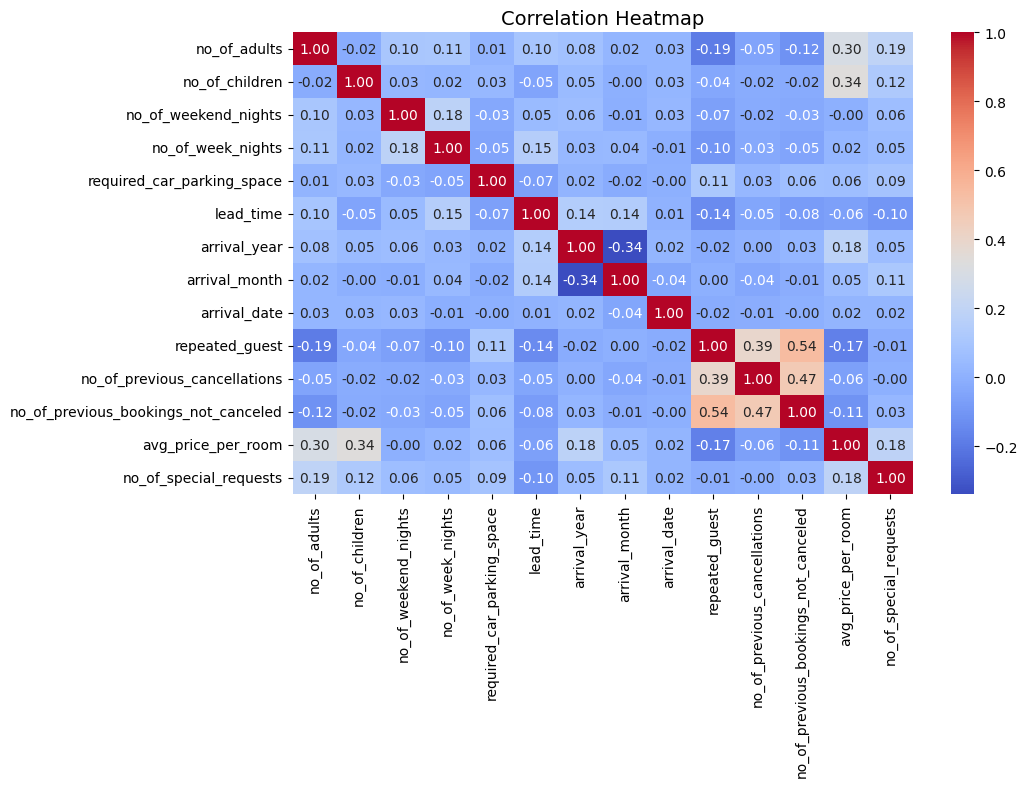

In [ ]:
# Correlation heatmap for numerical features
numerical_features = df1.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(10, 6))
correlation_matrix = df1[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


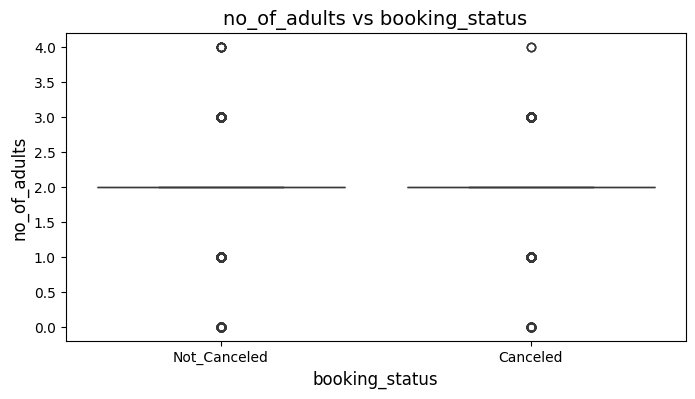

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


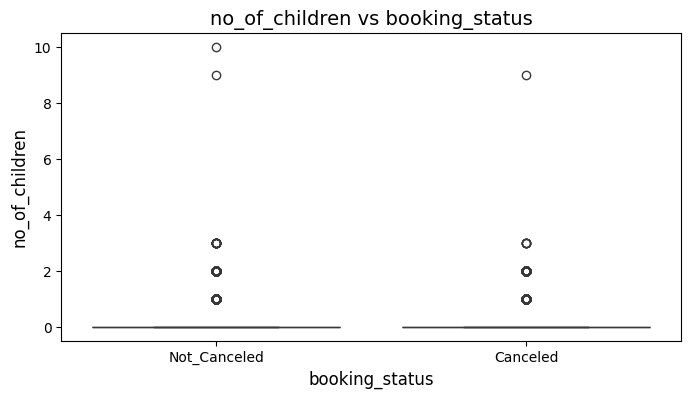

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


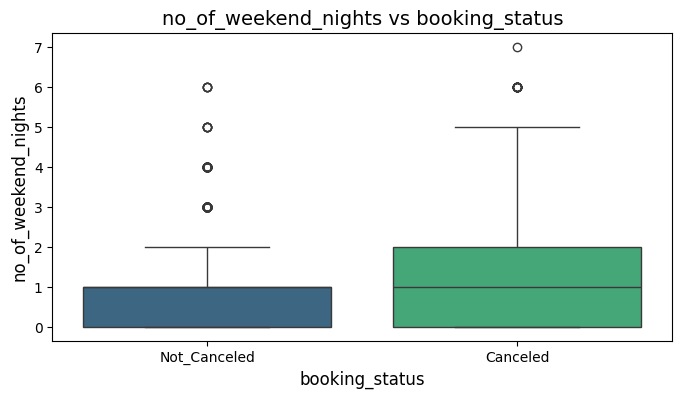

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


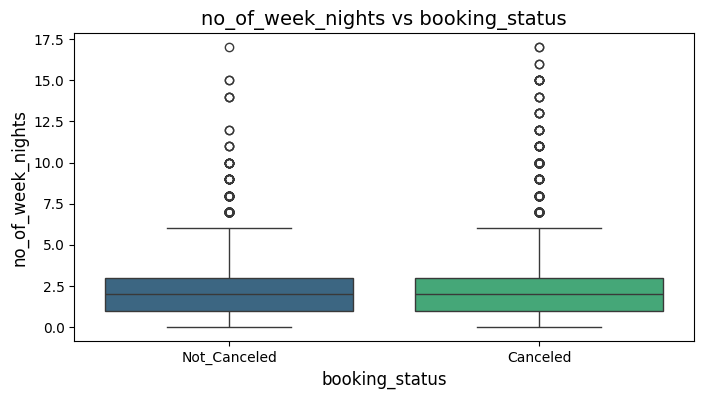

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


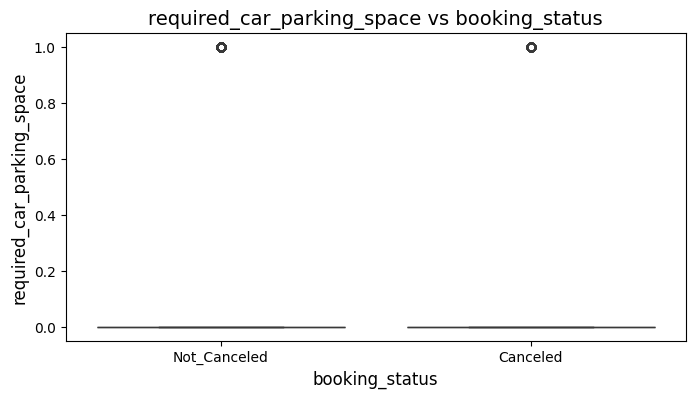

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


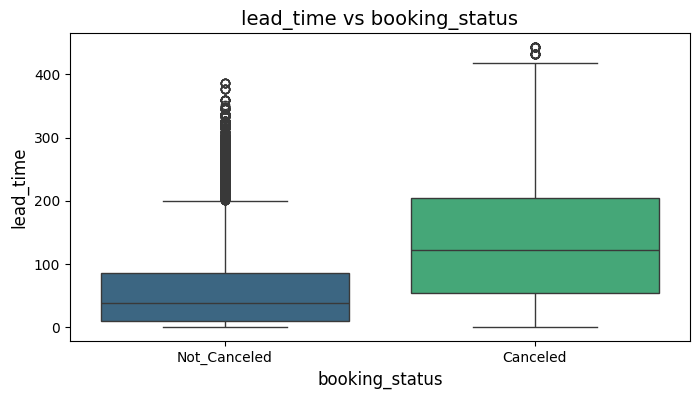

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


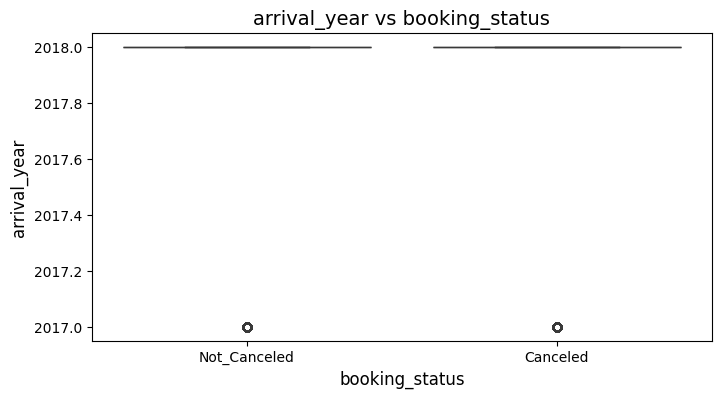

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


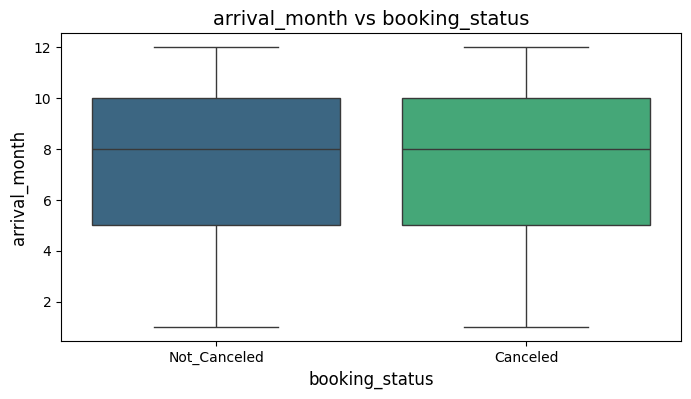

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


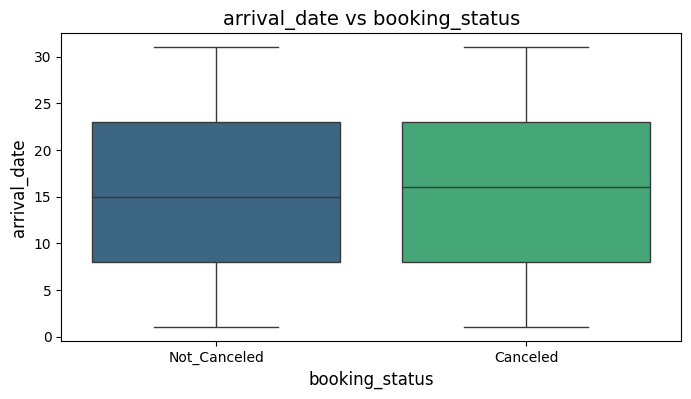

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


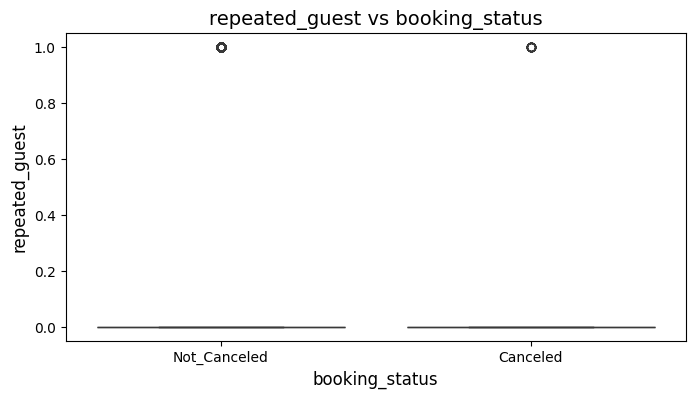

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


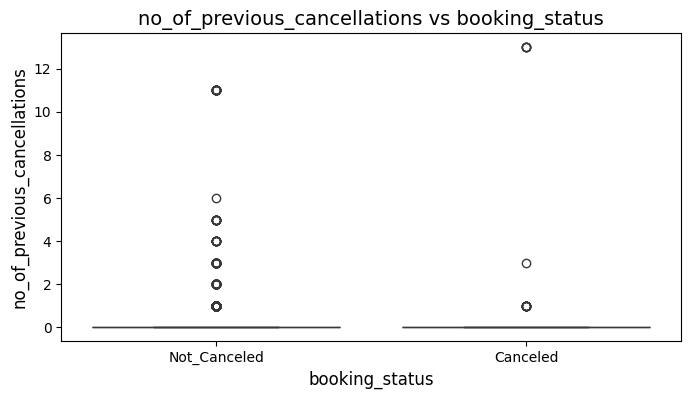

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


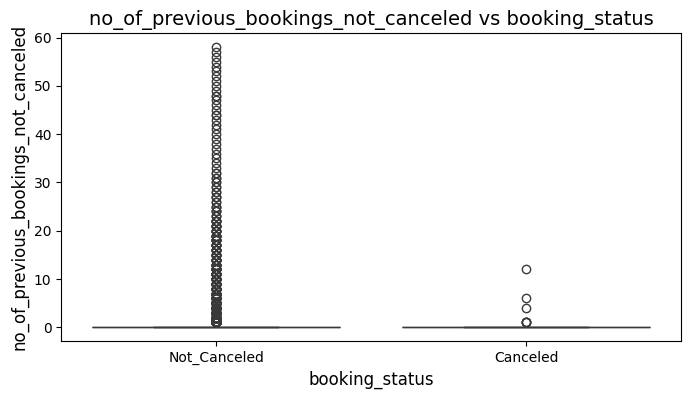

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


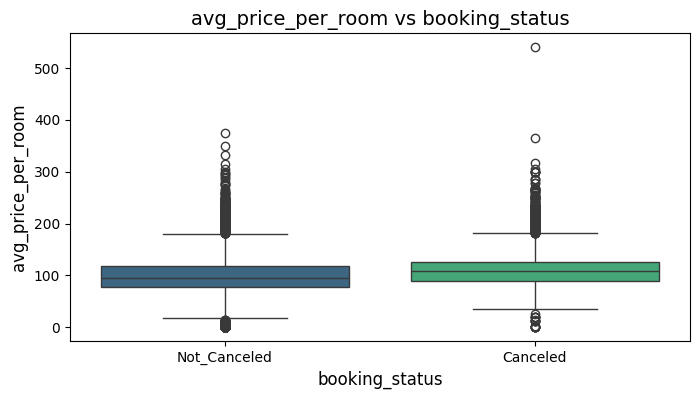

<ipython-input-22-3d7c08103876>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")


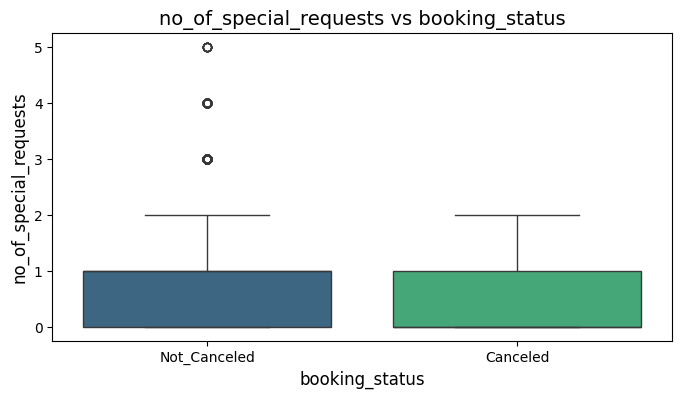

In [ ]:
# Boxplot for numerical features vs target variable
target_column = 'booking_status'
for feature in numerical_features:
    if feature != target_column:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df1, x=target_column, y=feature, palette="viridis")
        plt.title(f'{feature} vs {target_column}', fontsize=14)
        plt.xlabel(target_column, fontsize=12)
        plt.ylabel(feature, fontsize=12)
        plt.show()

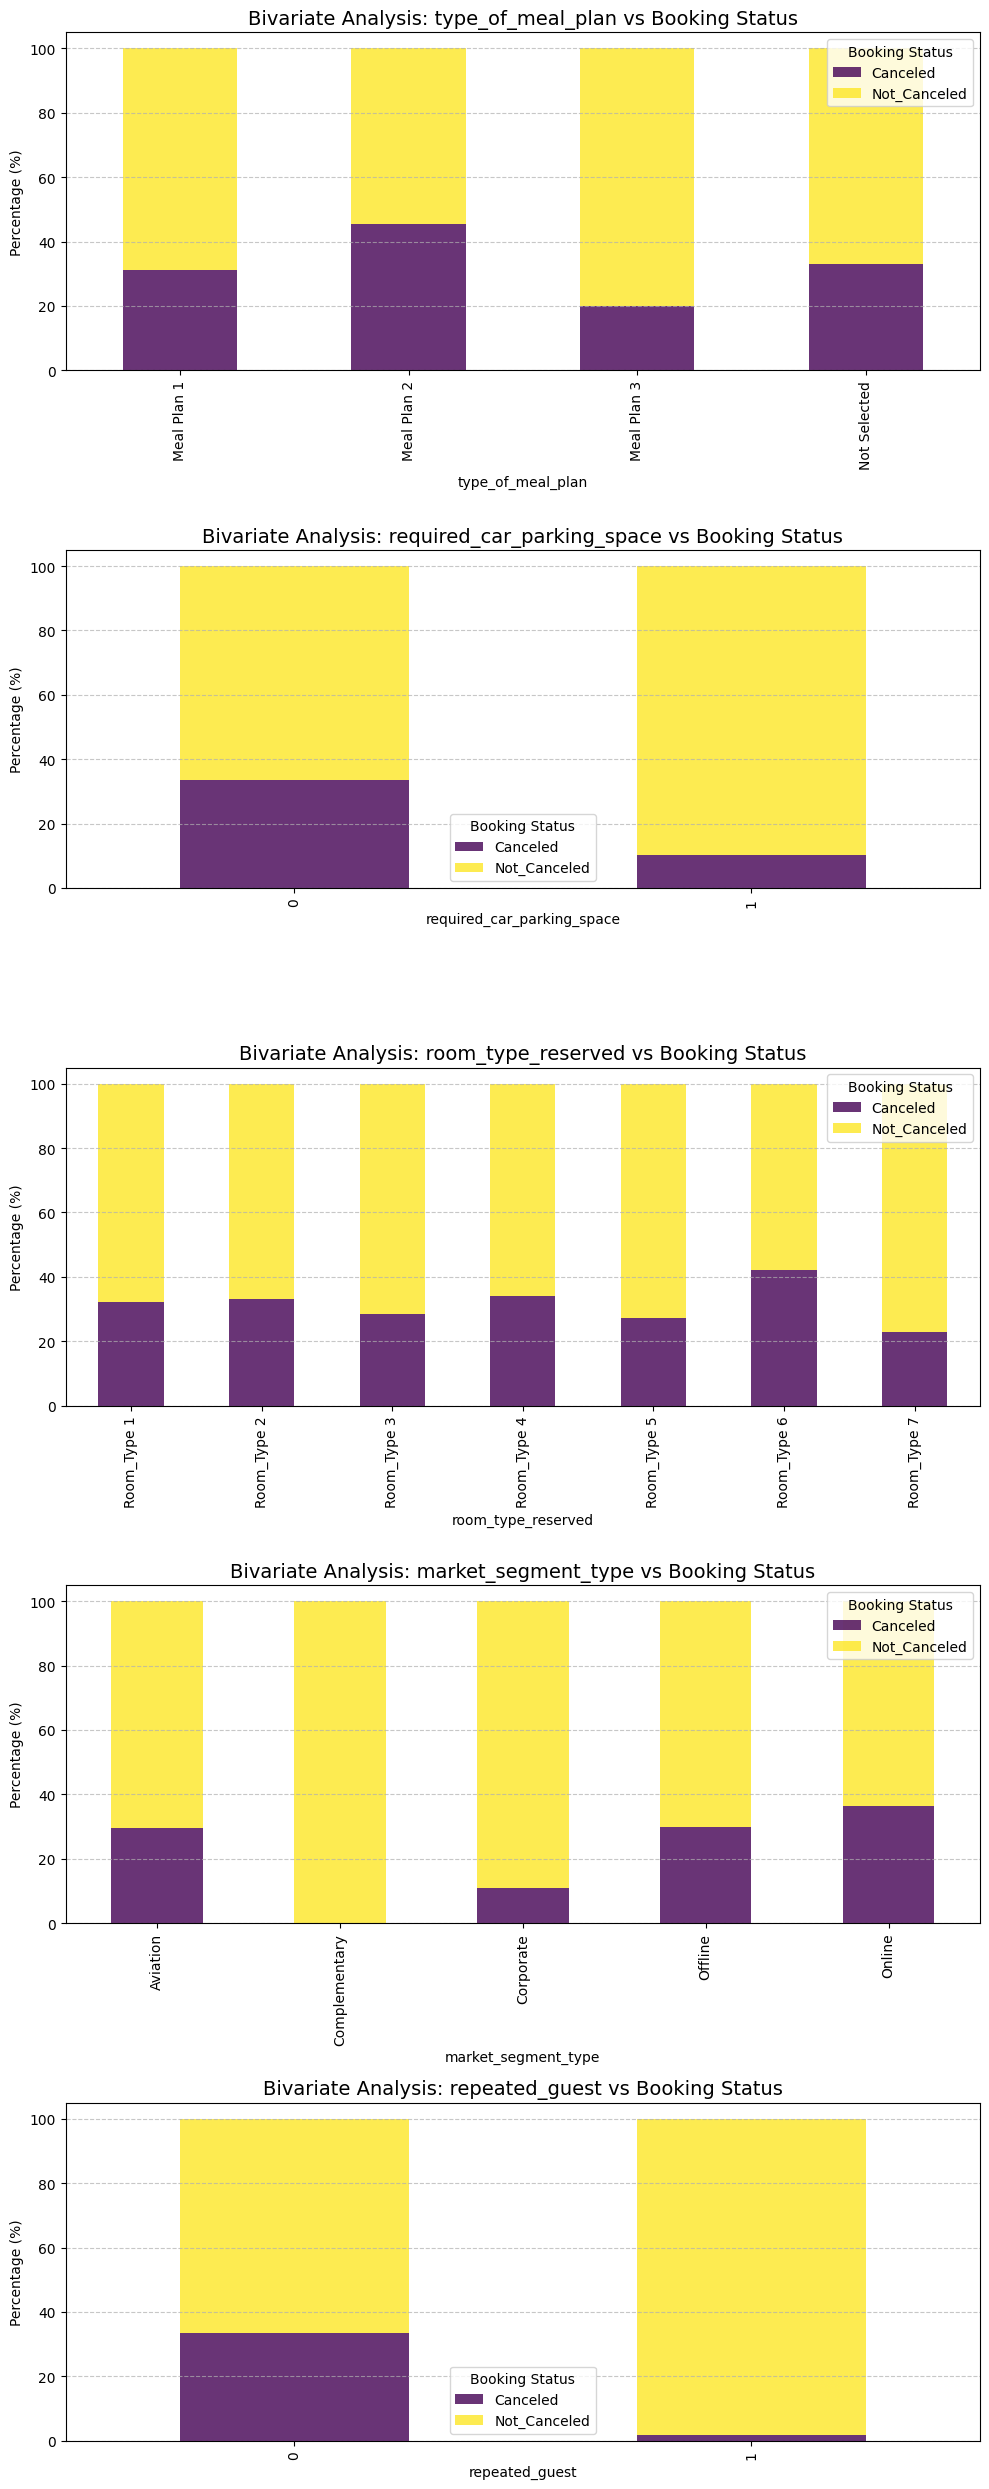

In [ ]:
# Select categorical variables (excluding 'Booking_ID' as it's unique to each row)
categorical_vars = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
                    'market_segment_type', 'repeated_guest']

# Create a subplot for each categorical variable
fig, axes = plt.subplots(len(categorical_vars), 1, figsize=(10, 25))

# Bivariate analysis for each categorical variable
for i, var in enumerate(categorical_vars):
    # Calculate percentage distribution of booking_status for each category
    cat_analysis = data.groupby(var)['booking_status'].value_counts(normalize=True).unstack() * 100

    # Plot the data as a stacked bar plot
    cat_analysis.plot(kind='bar', stacked=True, ax=axes[i], colormap='viridis', alpha=0.8)
    axes[i].set_title(f'Bivariate Analysis: {var} vs Booking Status', fontsize=14)
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_xlabel(var)
    axes[i].legend(title='Booking Status')
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

* Guests who do not require a car parking space are more likely to cancel.
* Certain room types (as encoded in the dataset) exhibit higher cancellation rates, likely due to their popularity or limited availability.
* Online bookings have the highest cancellation rate, likely due to ease of cancellation and impulse bookings.
* Repeated guests have a significantly lower cancellation rate, reinforcing their importance to the hotel's brand equity and loyalty programs.


# What are the busiest months in the hotel?

In [ ]:
# Calculate the total number of bookings per month
busiest_months = data.groupby('arrival_month').size().sort_values(ascending=False)

# Map month numbers to names for better readability
month_names = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May",
    6: "June", 7: "July", 8: "August", 9: "September", 10: "October",
    11: "November", 12: "December"
}
busiest_months.index = busiest_months.index.map(month_names)

busiest_months


,0
arrival_month,
October,5317
September,4611
August,3813
June,3203
December,3021
November,2980
July,2920
April,2736
May,2598


The busiest months for the hotel, ranked by the total number of bookings, are:

* October: 5,317 bookings
* September: 4,611 bookings
* August: 3,813 bookings

# Which market segment do most of the guests come from?

In [ ]:
# Calculate the distribution of bookings by market segment
market_segment_distribution = data['market_segment_type'].value_counts()

# Display the distribution
market_segment_distribution


,count
market_segment_type,
Online,23214
Offline,10528
Corporate,2017
Complementary,391
Aviation,125


* The majority of guests come from the Online market segment, with 23,214 bookings.

# Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [ ]:
# Calculate the distribution of bookings by market segment
market_segment_distribution = data['market_segment_type'].value_counts()

# Display the distribution
market_segment_distribution


,count
market_segment_type,
Online,23214
Offline,10528
Corporate,2017
Complementary,391
Aviation,125


# Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

In [ ]:
# Calculate the average room price for each market segment
room_price_by_segment = data.groupby('market_segment_type')['avg_price_per_room'].mean().sort_values(ascending=False)

# Display the results
room_price_by_segment


,avg_price_per_room
market_segment_type,
Online,112.256855
Aviation,100.704000
Offline,91.632679
Corporate,82.911740
Complementary,3.141765


# What percentage of bookings are canceled?

In [ ]:
# Calculate the percentage of canceled bookings
cancellation_rate = (data['booking_status'].value_counts(normalize=True)['Canceled'] * 100)

# Display the result
cancellation_rate


32.76361130254997

approximately 32.76% bookings are cancelled.

# Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [ ]:
# Filter data for repeating guests
repeating_guests = data[data['repeated_guest'] == 1]

# Calculate the percentage of cancellations among repeating guests
repeating_guest_cancellation_rate = (repeating_guests['booking_status'].value_counts(normalize=True)['Canceled'] * 100)

# Display the result
repeating_guest_cancellation_rate


1.7204301075268817

Approximately 1.72% of repeating guests cancel their bookings.

# Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [ ]:
# Analyze the relationship between special requests and booking cancellations
special_requests_cancellation_rate = data.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True).unstack()['Canceled'] * 100

# Display the cancellation rates by the number of special requests
special_requests_cancellation_rate


,Canceled
no_of_special_requests,
0,43.206755
1,23.766816
2,14.596700
3,NaN
4,NaN
5,NaN


Guests with no special requests are far more likely to cancel than those with one or more requests. so special requests may indicate a stronger commitment to the booking.

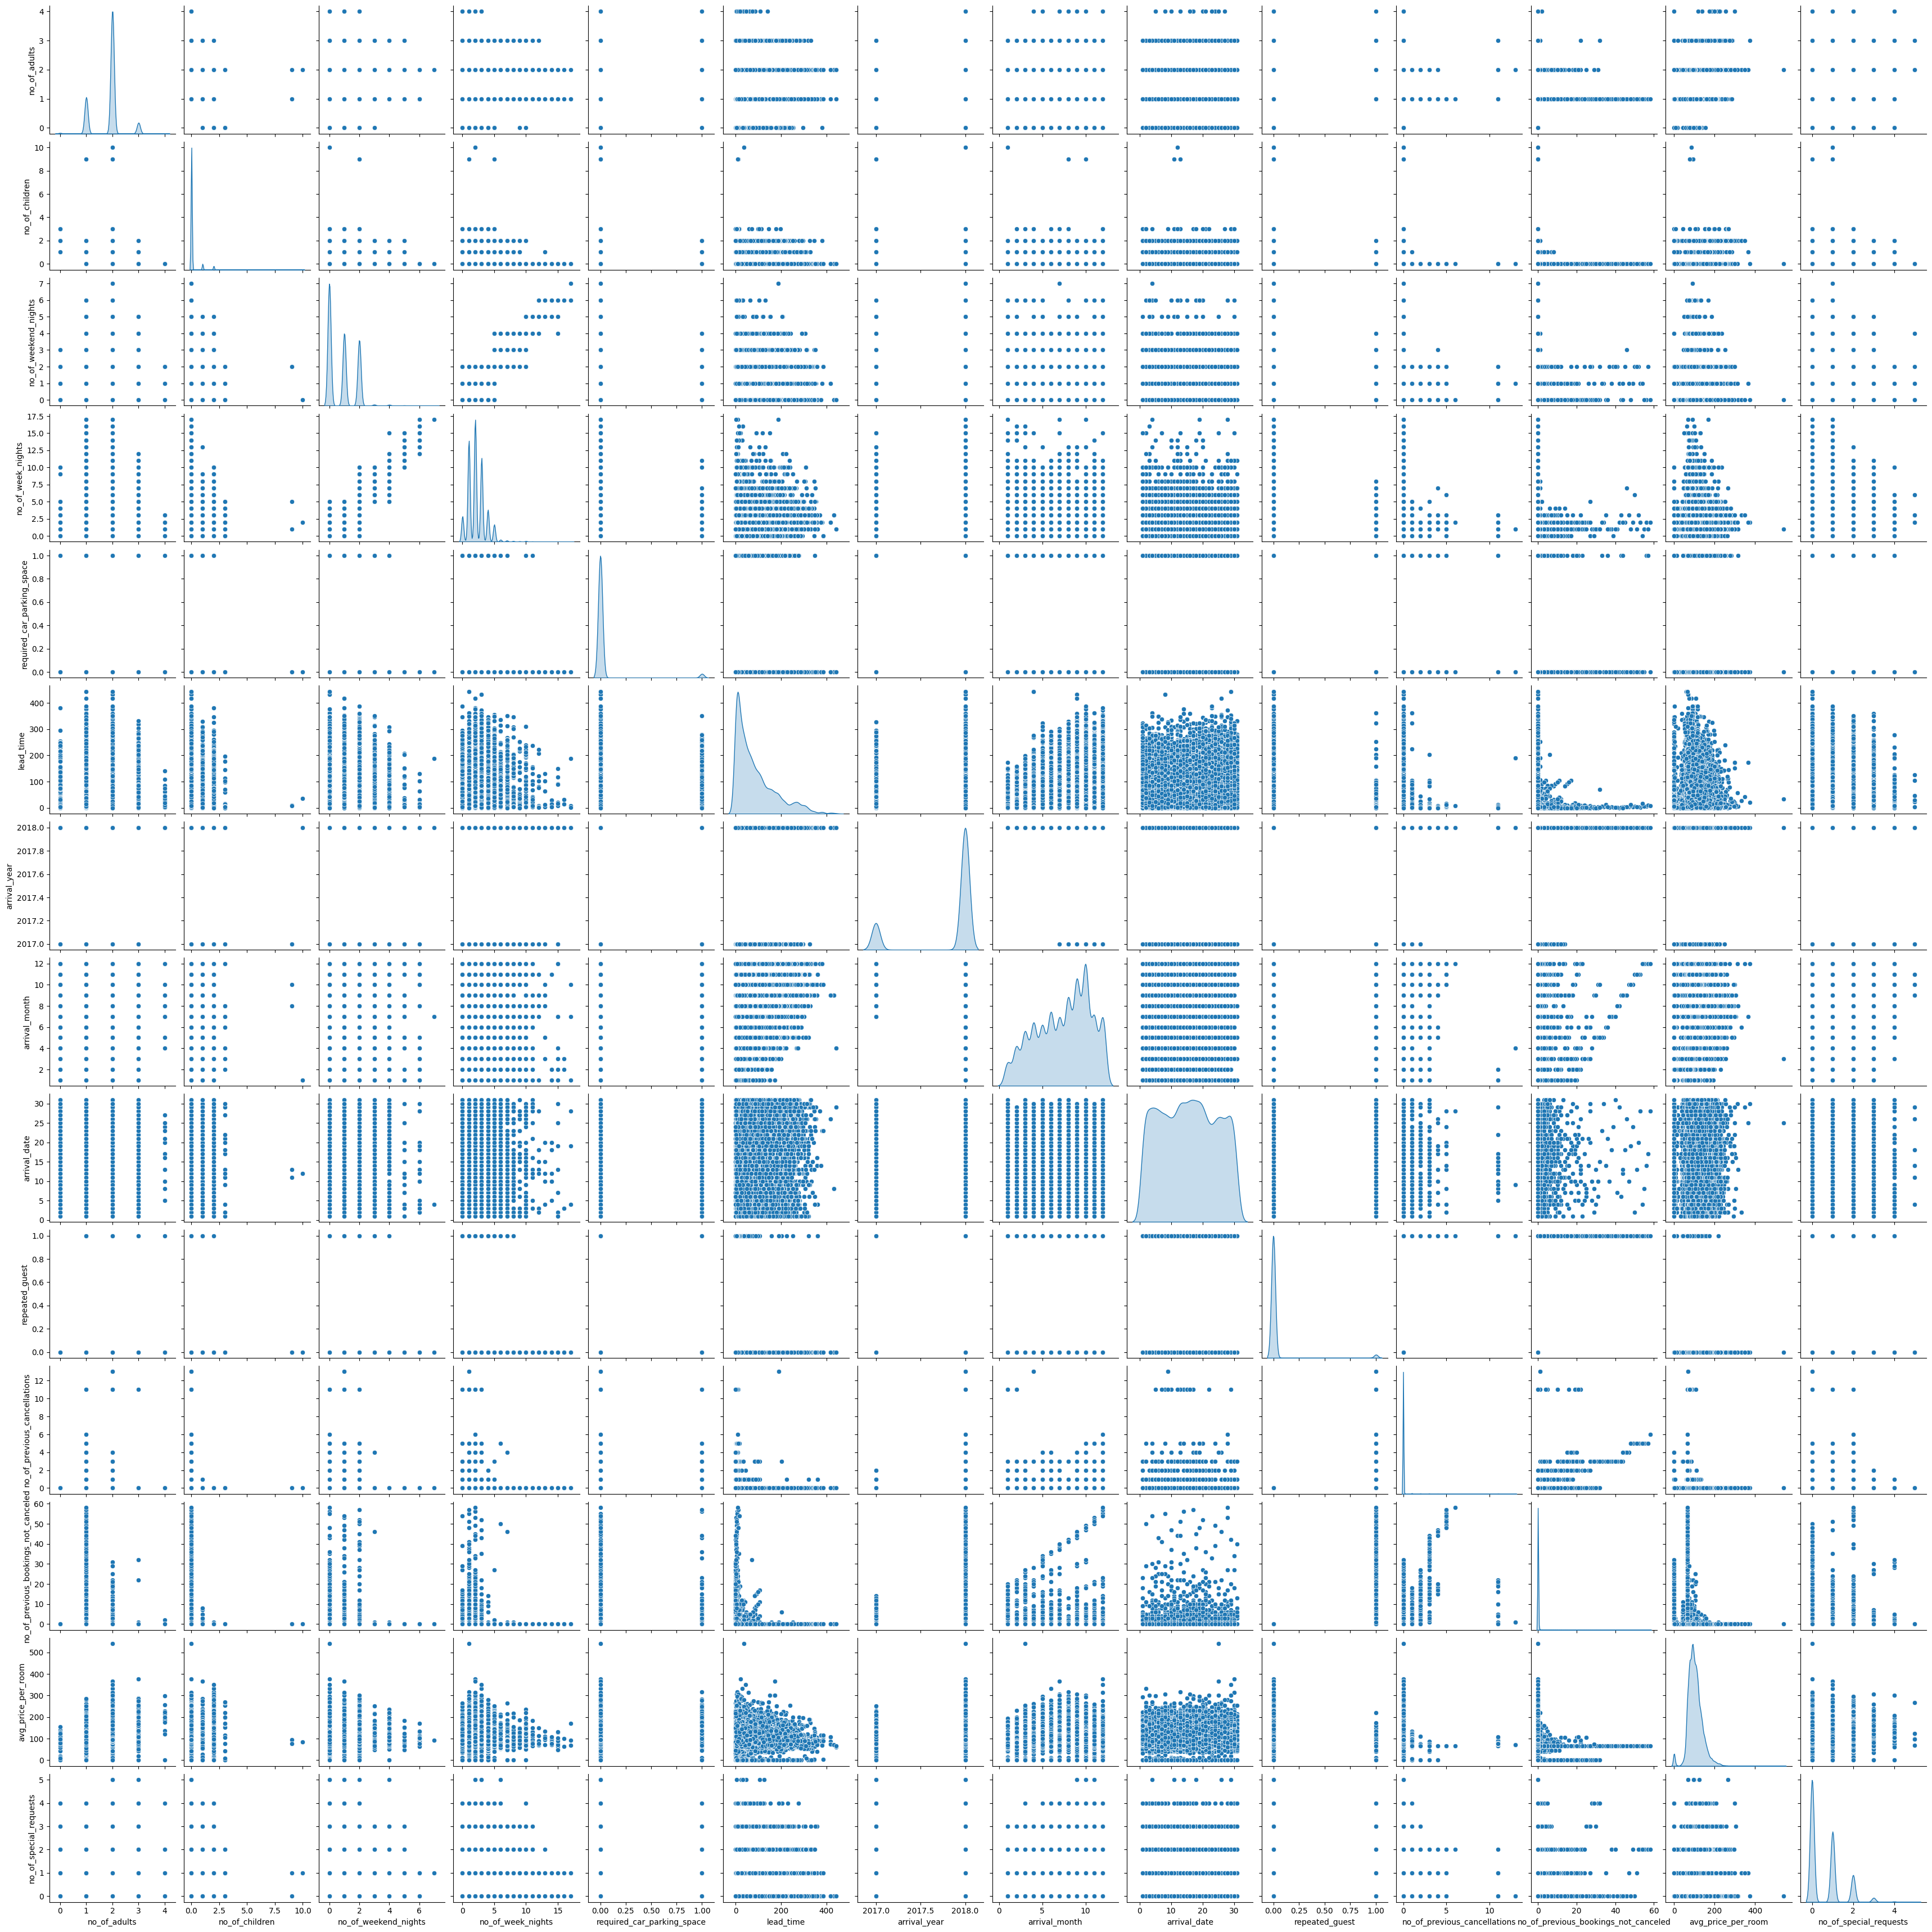

In [ ]:
sns.pairplot(df1,diag_kind='kde')

# Spliting the data

We will use 70% of data for training and 30% for testing.

In [10]:
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(data, columns=[
    'type_of_meal_plan', 'room_type_reserved', 'market_segment_type'
], drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop(columns=['Booking_ID', 'booking_status'])
y = data_encoded['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})  # Encode target as 0/1

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Output the shapes of the resulting datasets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Labels Shape: {y_train.shape}")
print(f"Testing Labels Shape: {y_test.shape}")

Training Features Shape: (25392, 27)
Testing Features Shape: (10883, 27)
Training Labels Shape: (25392,)
Testing Labels Shape: (10883,)


In [10]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df1.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df1.index)) * 100))

70.00% data is in training set
30.00% data is in test set


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Encode categorical variables using one-hot encoding
data_encoded = pd.get_dummies(df1, columns=[
    'type_of_meal_plan', 'room_type_reserved', 'market_segment_type'
], drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop(columns=['Booking_ID', 'booking_status'])
y = data_encoded['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})  # Encode target as 0/1

# Split the data into training and testing sets (70-30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Perform Logistic Regression
log_reg = LogisticRegression(solver="newton-cg", random_state=1)  # Increased max_iter to ensure convergence
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[6537  824]
 [1308 2214]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7361
           1       0.73      0.63      0.68      3522

    accuracy                           0.80     10883
   macro avg       0.78      0.76      0.77     10883
weighted avg       0.80      0.80      0.80     10883


Accuracy Score:
0.804098134705504


In [ ]:
model_score = log_reg.score(X_train, y_train)
print(model_score)

0.8034026465028355


In [ ]:
model_score = log_reg.score(X_test, y_test)
print(model_score)

0.804098134705504


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      7361
           1       0.73      0.63      0.68      3522

    accuracy                           0.80     10883
   macro avg       0.78      0.76      0.77     10883
weighted avg       0.80      0.80      0.80     10883



# KNN Classifier

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
# instantiate learning model (k = 3)
knn_3 = KNeighborsClassifier(n_neighbors = 3)
# fitting the model
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#confusion_matrix_sklearn(knn_3, X_train, y_train)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

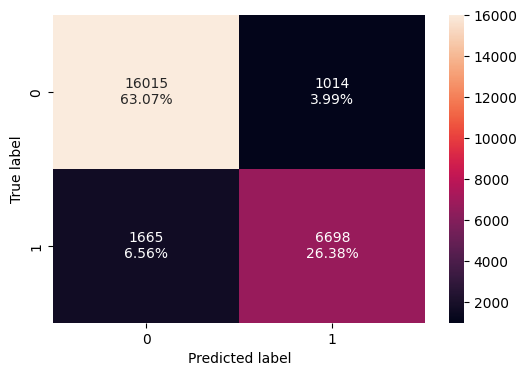

In [ ]:
confusion_matrix_sklearn(knn_3, X_train, y_train)

In [ ]:
knn_perf_train_3 = model_performance_classification_sklearn(
    knn_3, X_train, y_train
)
knn_perf_train_3

,Accuracy,Recall,Precision,F1
0,0.894494,0.800909,0.868517,0.833344


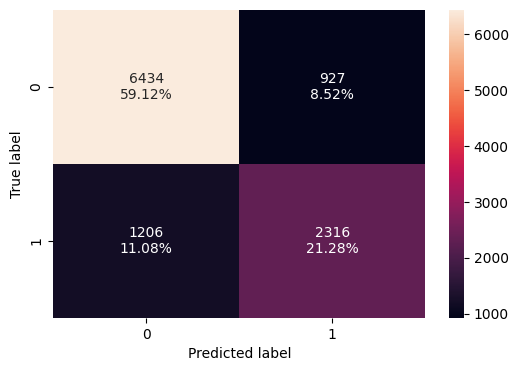

In [ ]:
confusion_matrix_sklearn(knn_3, X_test, y_test)

In [ ]:
knn_perf_test_3 = model_performance_classification_sklearn(
    knn_3, X_test, y_test
)
knn_perf_test_3

,Accuracy,Recall,Precision,F1
0,0.804006,0.657581,0.714154,0.684701


# K with different values

In [ ]:
# creating odd list of K for KNN
# myList = list(range(2,20))

# subsetting just the odd ones
# neighbors = list(filter(lambda x: x % 2 != 0, myList))

# creating a list of odd values of K for KNN
neighbors = [i for i in range(3,20) if i%2 != 0]

# empty list that will hold recall scores
recall_scores_train = []
recall_scores_test = []

# perform recall metrics
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # predict on train and test
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    # evaluate recall on train and test
    scores_train = recall_score(y_train, y_pred_train)
    recall_scores_train.append(scores_train)
    scores_test = recall_score(y_test, y_pred_test)
    recall_scores_test.append(scores_test)

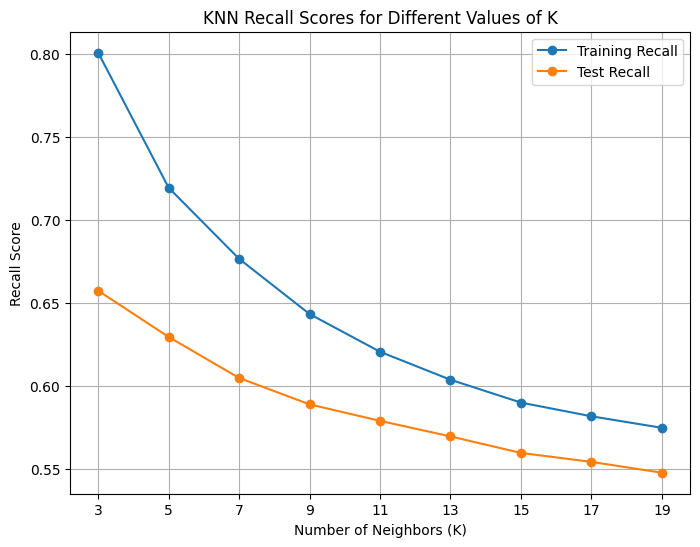

In [ ]:
import matplotlib.pyplot as plt

# Plot recall scores for training and test sets
plt.figure(figsize=(8, 6))
plt.plot(neighbors, recall_scores_train, label='Training Recall', marker='o')
plt.plot(neighbors, recall_scores_test, label='Test Recall', marker='o')
plt.title('KNN Recall Scores for Different Values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Recall Score')
plt.xticks(neighbors)
plt.legend()
plt.grid(True)
plt.show()

* The recall scores for both training and test sets are highest when k=3. This suggests that with k=3, the model is better at identifying positive instances in both the training and test data compared to other values of k.

* As the value of k increases beyond 3, the recall scores tend to decrease for both training and test sets. This indicates a potential risk of the model not being able to identify the underlying patterns in the data.

* Therefore, based on the provided recall scores, k=3 appears to be the most suitable choice for balancing model performance between capturing positive instances effectively and generalizing well to new data.

# Naive-Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
booking_model = GaussianNB()

booking_model.fit(X_train, y_train.ravel())

<ipython-input-37-c752eb51c896>:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  booking_model.fit(X_train, y_train.ravel())


GaussianNB()

In [ ]:
booking_train_predict = booking_model.predict(X_train)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, booking_train_predict)))
print()

Model Accuracy: 0.4130



## Performance of our model with testing data

In [ ]:
booking_test_predict = booking_model.predict(X_test)

from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, booking_test_predict)))
print()

Model Accuracy: 0.4095



## Lets check the confusion matrix and classification report

Confusion Matrix


<Axes: >

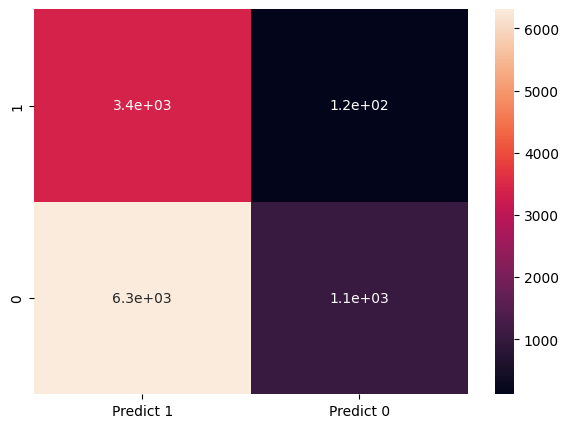

In [ ]:
print("Confusion Matrix")
cm=metrics.confusion_matrix(y_test, booking_test_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

In [ ]:
print("Classification Report")
print(metrics.classification_report(y_test, booking_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.35      0.97      0.51      3522
           0       0.90      0.14      0.25      7361

    accuracy                           0.41     10883
   macro avg       0.62      0.55      0.38     10883
weighted avg       0.72      0.41      0.33     10883



[0.8125516861159606]
[0.8125516861159606, 0.8040062482771295]
[0.8125516861159606, 0.8040062482771295, 0.8055683175594964]
[0.8125516861159606, 0.8040062482771295, 0.8055683175594964, 0.8052926582743729]
[0.8125516861159606, 0.8040062482771295, 0.8055683175594964, 0.8052926582743729, 0.8061196361297437]
[0.8125516861159606, 0.8040062482771295, 0.8055683175594964, 0.8052926582743729, 0.8061196361297437, 0.804098134705504]
[0.8125516861159606, 0.8040062482771295, 0.8055683175594964, 0.8052926582743729, 0.8061196361297437, 0.804098134705504, 0.8063952954148672]
[0.8125516861159606, 0.8040062482771295, 0.8055683175594964, 0.8052926582743729, 0.8061196361297437, 0.804098134705504, 0.8063952954148672, 0.804281907562253]
[0.8125516861159606, 0.8040062482771295, 0.8055683175594964, 0.8052926582743729, 0.8061196361297437, 0.804098134705504, 0.8063952954148672, 0.804281907562253, 0.803914361848755]
[0.8125516861159606, 0.8040062482771295, 0.8055683175594964, 0.8052926582743729, 0.806119636129743

<ipython-input-42-a6d056644080>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x=noofk,y=accuracy,ci=None) # Plot the data with the same lengths for x and y


<Axes: >

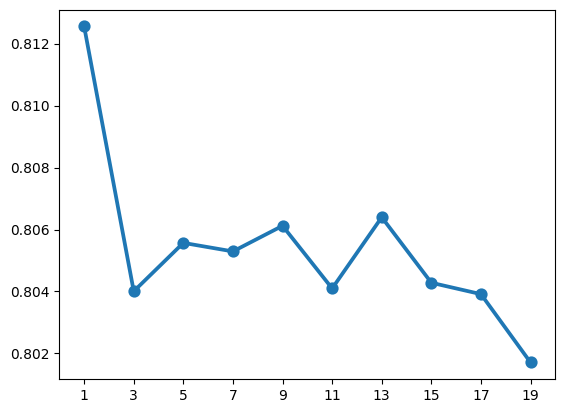

In [ ]:
noofk=list(range(1,20,2))
accuracy=[]
for k in noofk:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    #y_pred=knn.predict(X_test)
    acc=knn.score(X_test, y_test) # Calculate accuracy once
    accuracy.append(acc) # Append the accuracy to the list
    print(accuracy) # Print the updated accuracy list

sns.pointplot(x=noofk,y=accuracy,ci=None) # Plot the data with the same lengths for x and y

In [ ]:
finalmodel=KNeighborsClassifier(n_neighbors = 1)
finalmodel.fit(X_train, y_train)
print(classification_report(y_test, finalmodel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7361
           1       0.70      0.73      0.71      3522

    accuracy                           0.81     10883
   macro avg       0.79      0.79      0.79     10883
weighted avg       0.81      0.81      0.81     10883



#Support Vector Machine(SVM)

In [29]:
# defining a function to compute different metrics to check performance of a classification model
def model_performance_classification(
    model, predictors, target
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting the class labels.
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [30]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(y_true=target,y_pred= y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [31]:
# fitting SVM model
svm = SVC(kernel='linear')
svm.fit(X_train,y_train)

SVC(kernel='linear')

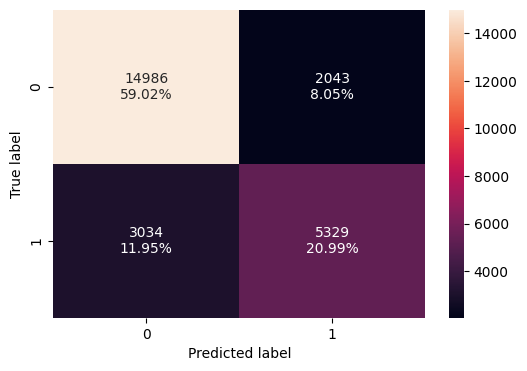

In [33]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

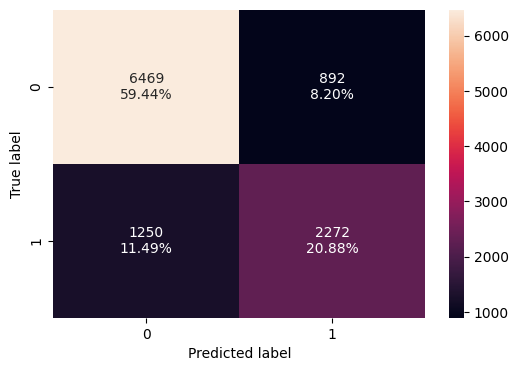

In [34]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [35]:
print("Training performance:")
model_lin_kern = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [36]:
model_lin_kern

,Accuracy,Recall,Precision,F1
0,0.800055,0.637212,0.72287,0.677344


In [37]:
print("Test performance:")
model_lin_kern_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [38]:
model_lin_kern_test

,Accuracy,Recall,Precision,F1
0,0.803179,0.645088,0.718078,0.679629


##Observations

* The train and test f1_score of the model is ~0.67 and we will try to improve it further

# Model Performance Improvement
* Let's see if the f1_score can be improved further by changing the hyperparameters i.e, the kernel, C and gamma.

# Support Vector Machine (Kernel = "Polynomial" , Degree = 2 )


In [39]:
# fitting SVM model
svm = SVC(kernel='poly',degree=2)
svm.fit(X_train,y_train)

SVC(degree=2, kernel='poly')

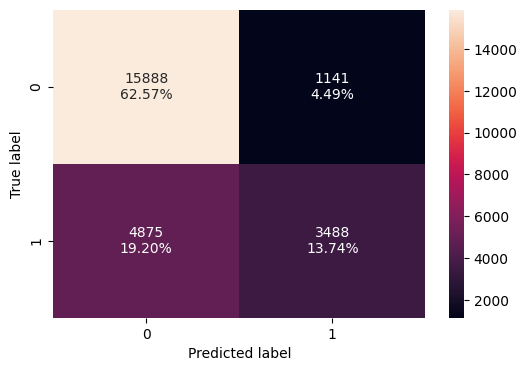

In [40]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

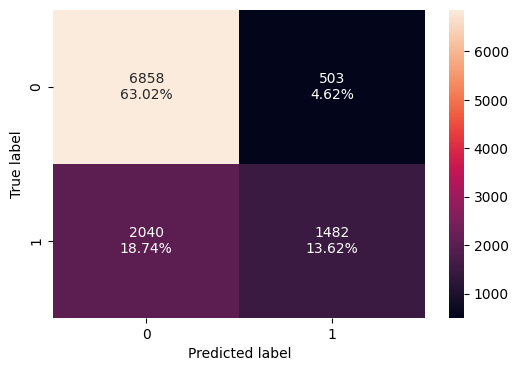

In [41]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [42]:
print("Training performance:")
model_poly_kern = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [43]:
model_poly_kern

,Accuracy,Recall,Precision,F1
0,0.763075,0.417075,0.75351,0.536946


In [44]:
print("Test performance:")
model_poly_kern_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [45]:
model_poly_kern_test

,Accuracy,Recall,Precision,F1
0,0.766333,0.420784,0.746599,0.538224


performance is decreasing.

# Support Vector Machine (Kernel = "Polynomial" , Degree = 3 )

In [46]:
# fitting SVM model
svm = SVC(kernel='poly',degree=3)
svm.fit(X_train,y_train)

SVC(kernel='poly')

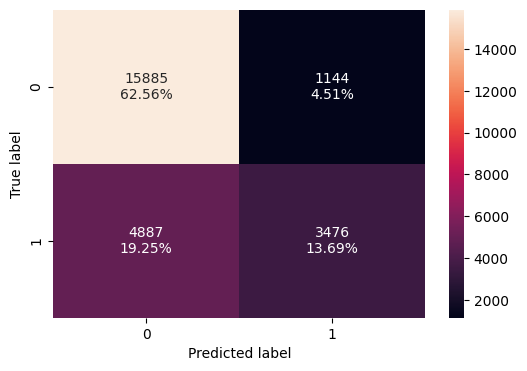

In [47]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

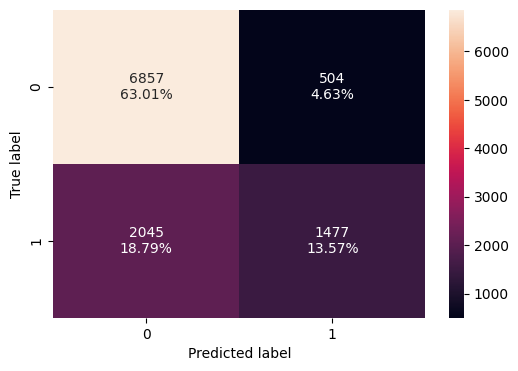

In [48]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [49]:
print("Training performance:")
model_poly_kern_3 = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [50]:
model_poly_kern_3

,Accuracy,Recall,Precision,F1
0,0.762484,0.41564,0.752381,0.535469


In [51]:
print("Test performance:")
model_poly_kern_3_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [52]:
model_poly_kern_3_test

,Accuracy,Recall,Precision,F1
0,0.765781,0.419364,0.745583,0.536798


performance is not changing by increasing the degree of polynomial.

* Let's change the kernel to rbf.

# Support Vector Machine (Kernel = "Rbf")

In [53]:
# fitting SVM model
svm = SVC(kernel='rbf')
svm.fit(X_train,y_train)

SVC()

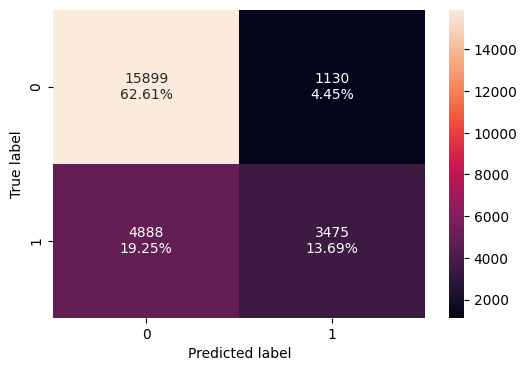

In [54]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

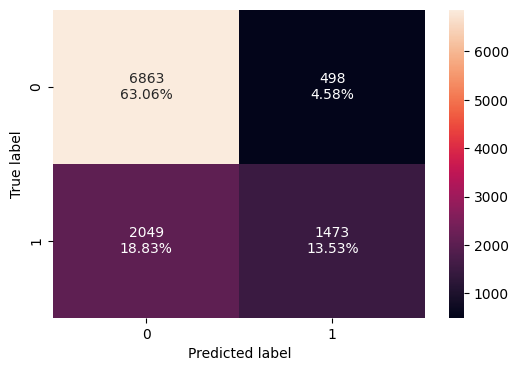

In [55]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [56]:
print("Training performance:")
model_rbf_kern = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [57]:
model_rbf_kern

,Accuracy,Recall,Precision,F1
0,0.762996,0.415521,0.754615,0.535935


In [58]:
print("Test performance:")
model_rbf_kern_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [59]:
model_rbf_kern_test

,Accuracy,Recall,Precision,F1
0,0.765965,0.418228,0.747336,0.536319


## Observations

* There is no much improvment.

# Support Vector Machine (Gamma = 0.016)

In [60]:
svm._gamma

2.555378646780098e-07

In [61]:
#fitting SVM model
svm = SVC(kernel='poly',degree=2,gamma=0.3)
svm.fit(X_train,y_train)


SVC(degree=2, gamma=0.3, kernel='poly')

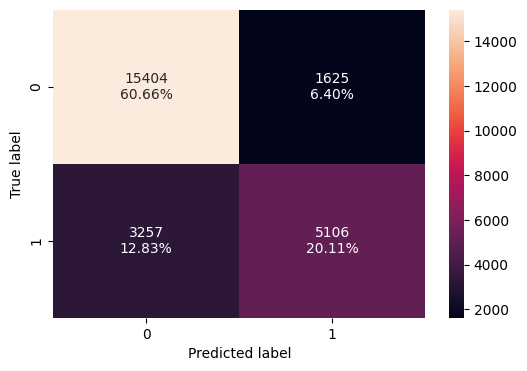

In [62]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

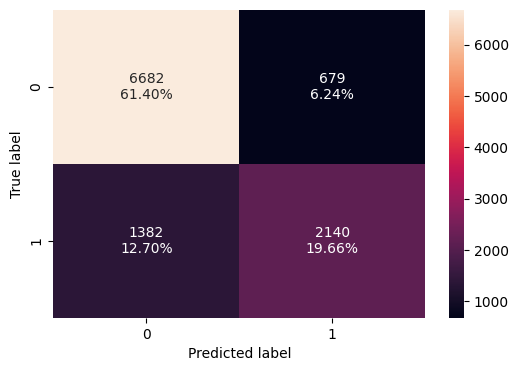

In [63]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [64]:
print("Training performance:")
model_poly_gamma_1 = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [65]:
model_poly_gamma_1


,Accuracy,Recall,Precision,F1
0,0.807735,0.610546,0.75858,0.67656


In [66]:
print("Test performance:")
model_poly_gamma_1_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [67]:
model_poly_gamma_1_test

,Accuracy,Recall,Precision,F1
0,0.810622,0.607609,0.759134,0.674972


##observation:
* The performace is improved

# Support Vector Machine ( C = 0.1 )

In [68]:
# fitting SVM model
svm = SVC(kernel='poly',degree=2,gamma=0.3,C=0.1)
svm.fit(X_train,y_train)

SVC(C=0.1, degree=2, gamma=0.3, kernel='poly')

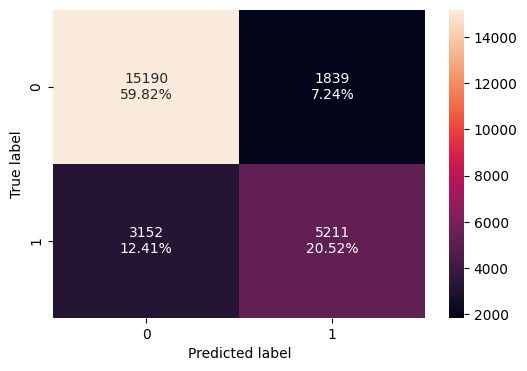

In [69]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

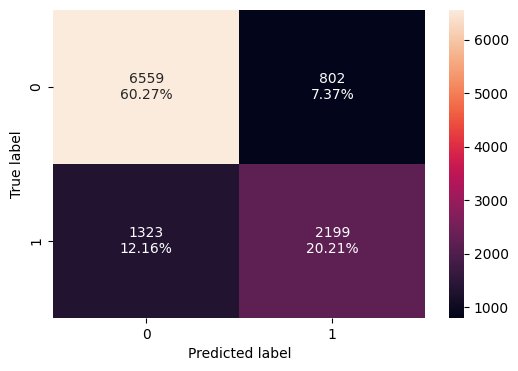

In [70]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [71]:
print("Training performance:")
model_poly_C_1 = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [72]:
model_poly_C_1

,Accuracy,Recall,Precision,F1
0,0.803442,0.623102,0.739149,0.676182


In [73]:
print("Test performance:")
model_poly_C_1_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [74]:
model_poly_C_1_test

,Accuracy,Recall,Precision,F1
0,0.804741,0.624361,0.732756,0.67423


# Support Vector Machine ( C = 0.05 )

In [75]:
# fitting SVM model
svm = SVC(kernel='poly',degree=2,gamma=0.3,C=0.05)
svm.fit(X_train,y_train)

SVC(C=0.05, degree=2, gamma=0.3, kernel='poly')

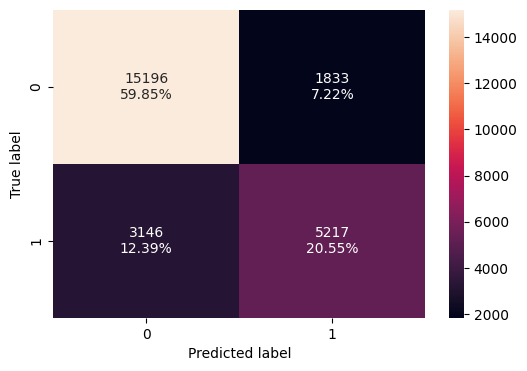

In [76]:
confusion_matrix_sklearn(model=svm,predictors= X_train, target=y_train)

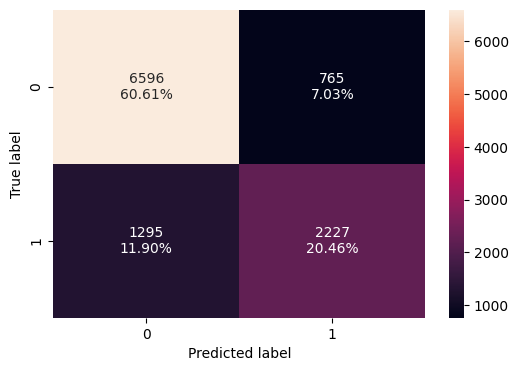

In [77]:
confusion_matrix_sklearn(model=svm,predictors= X_test, target=y_test)

In [78]:
print("Training performance:")
model_poly_C_2 = model_performance_classification(model=svm, predictors=X_train, target=y_train)

Training performance:


In [79]:
model_poly_C_2

,Accuracy,Recall,Precision,F1
0,0.803915,0.623819,0.74,0.676961


In [80]:
print("Test performance:")
model_poly_C_2_test = model_performance_classification(model=svm, predictors=X_test, target=y_test)

Test performance:


In [81]:
model_poly_C_2_test

,Accuracy,Recall,Precision,F1
0,0.810714,0.632311,0.744318,0.683758


No improvement.

# Model Performance Comparison and Final Model Selection

In [82]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_lin_kern.T,
        model_poly_kern.T,
        model_poly_kern_3.T,
        model_rbf_kern.T,
        model_poly_gamma_1.T,
        model_poly_C_1.T,
        model_poly_C_2.T

    ],
    axis=1,
)

models_train_comp_df.columns = [
    "SVM-Linear Kernel (default)",
    "SVM-Polynomial Kernel , degree = 2",
    "SVM-Polynomial Kernel , degree = 3",
    "SVM-Rbf Kernel",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.016 ",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.3, C = 0.1 ",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.3 , C = 0.05 "

]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,SVM-Linear Kernel (default),"SVM-Polynomial Kernel , degree = 2","SVM-Polynomial Kernel , degree = 3",SVM-Rbf Kernel,"SVM-Polynomial Kernel , degree = 2 , gamma = 0.016","SVM-Polynomial Kernel , degree = 2 , gamma = 0.3, C = 0.1","SVM-Polynomial Kernel , degree = 2 , gamma = 0.3 , C = 0.05"
Accuracy,0.800055,0.763075,0.762484,0.762996,0.807735,0.803442,0.803915
Recall,0.637212,0.417075,0.415640,0.415521,0.610546,0.623102,0.623819
Precision,0.722870,0.753510,0.752381,0.754615,0.758580,0.739149,0.740000
F1,0.677344,0.536946,0.535469,0.535935,0.676560,0.676182,0.676961


* The linear kernel and the polynomial kernel (degree = 2, gamma = 0.3, C = 0.05) have the best balance across all metrics, with similar F1 scores (~0.677).

* The linear kernel is simpler and has fewer hyperparameters, making it a good default choice.

In [83]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
      model_lin_kern_test.T,
        model_poly_kern_test.T,
        model_poly_kern_3_test.T,
        model_rbf_kern_test.T,
        model_poly_gamma_1_test.T,
        model_poly_C_1_test.T,
        model_poly_C_2_test.T
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "SVM-Linear Kernel (default)",
    "SVM-Polynomial Kernel , degree = 2",
    "SVM-Polynomial Kernel , degree = 3",
    "SVM-Rbf Kernel",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.016 ",
    "SVM-Polynomial Kernel , degree = 2 , gamma = 0.3, C = 0.1 ",
    "SVM-Polynomial Kernel , degree = 2, gamma = 0.3 , C = 0.05 "

]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,SVM-Linear Kernel (default),"SVM-Polynomial Kernel , degree = 2","SVM-Polynomial Kernel , degree = 3",SVM-Rbf Kernel,"SVM-Polynomial Kernel , degree = 2 , gamma = 0.016","SVM-Polynomial Kernel , degree = 2 , gamma = 0.3, C = 0.1","SVM-Polynomial Kernel , degree = 2, gamma = 0.3 , C = 0.05"
Accuracy,0.803179,0.766333,0.765781,0.765965,0.810622,0.804741,0.810714
Recall,0.645088,0.420784,0.419364,0.418228,0.607609,0.624361,0.632311
Precision,0.718078,0.746599,0.745583,0.747336,0.759134,0.732756,0.744318
F1,0.679629,0.538224,0.536798,0.536319,0.674972,0.674230,0.683758



* Use Polynomial Kernel with Degree = 2, Gamma = 0.3, and C = 0.05:

* Best performance on the test set.
Balances recall, precision, and F1 score effectively.

# Insights from the analysis conducted



## Logistic Regression:

* Accuracy is 80.41% which is behind the models KNN and SVM.
* Recall is 0.63 which is low compared to KNN and SVM.
* Precision is  0.73 which is better than KNN, but lower than SVM).
* F1-Score is 0.68 which is good.

Conclusion: Logistic regression is a good baseline model but recall is less.

## KNN:

* Accuracy is  81%,which is higher than logistic regression.
* Recall  is 0.73 best among all algorithms.
* Precision is 0.70 which is lower than logistic regression and SVM.
*F1-Score is  0.71 better than logistic regression.

Conclusion: KNN is good interms of  recall and accuracy. But  precision is less

##SVM (Best Configuration - Polynomial Kernel, Degree = 2, Gamma = 0.3, C = 0.05):

* Accuracy is best in all the models which is 81.07%.
* Recall is 0.6323 which is  lower than KNN.
* Precision is 0.7443, highest among all models.
* F1-Score is  0.6838, slight better than logistic regression but slight worse than KNN.

Conclusion: SVM offers the highest accuracy and precision.
Best Algorithm Selection



# Actionable business recommendations:

1. If Recall is Most Important:
KNN is the best choice because it achieves the highest recall 0.73.
2. If Precision is Most Important:
SVM with Polynomial Kernel (Degree = 2, Gamma = 0.3, C = 0.05) is the best choice.
3. If Overall Balance (F1-Score) is Most Important:
KNN is a strong contender due to its balanced F1-Score of 0.71.

4. If Accuracy is Most Important:
SVM narrowly edges out KNN with an accuracy of 81.07% compared to KNN’s 81%.

## Final Recommendation
* Choose KNN if recall  is your priority.

* Choose SVM  if you need the highest accuracy and precision or a balanced performance.